In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sum(x**2)

def grad_f(x):
    return 2 * x

def gradient_descent(x0, learning_rate, num_iterations):
    x = x0.copy()
    history = []
    for _ in range(num_iterations):
        grad = grad_f(x)
        x -= learning_rate * grad
        history.append(f(x))
    return history

def adam(x0, learning_rate, num_iterations, beta1=0.9, beta2=0.999, epsilon=1e-8):
    x = x0.copy()
    m = np.zeros_like(x)  # First moment (mean)
    v = np.zeros_like(x)  # Second moment (uncentered variance)
    history = []
    for t in range(1, num_iterations + 1):
        grad = grad_f(x)
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * grad**2
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)
        x -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
        history.append(f(x))
    return history

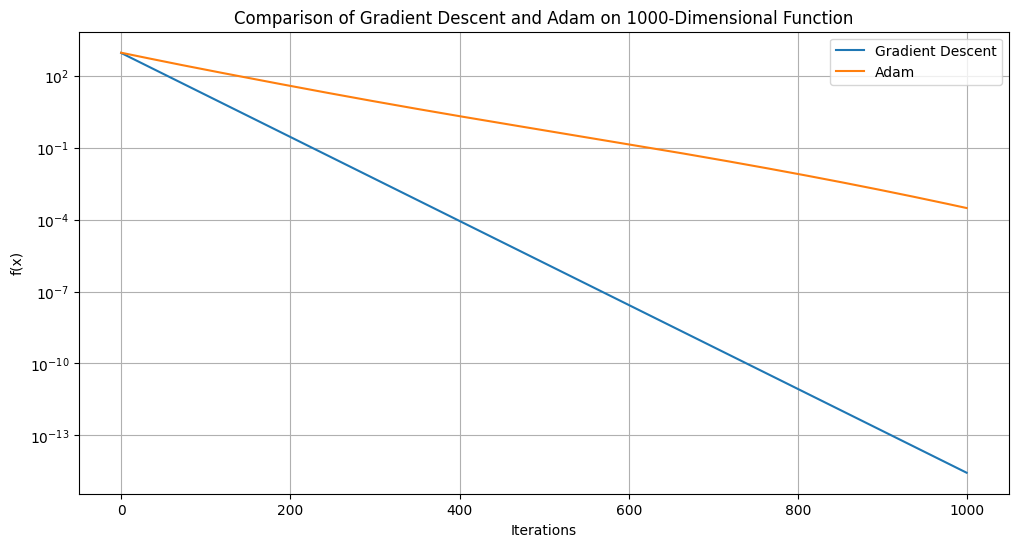

In [2]:
np.random.seed(42)
x0 = np.random.randn(1000)  
learning_rate = 0.01
num_iterations = 1000

gd_history = gradient_descent(x0, learning_rate, num_iterations)
adam_history = adam(x0, learning_rate, num_iterations)

plt.figure(figsize=(12, 6))
plt.plot(gd_history, label="Gradient Descent")
plt.plot(adam_history, label="Adam")
plt.xlabel("Iterations")
plt.ylabel("f(x)")
plt.title("Comparison of Gradient Descent and Adam on 1000-Dimensional Function")
plt.legend()
plt.grid()
plt.yscale("log") 
plt.show()

## (b) Why Does Adam Perform Better Than SGD in High-Dimensional Spaces?

Adaptive Learning Rates:

Adam learns the learning rate for every parameter uniquely, which is very important in high-dimensional spaces where parameters can have various scales or sensitivities.

Momentum:

Adam includes momentum, which aids in speeding up convergence by making the gradient updates smoother.

Handling Sparse Gradients:

In high-dimensional spaces, gradients tend to be sparse (most dimensions have zero or nearly zero gradients). Adam's adaptive learning rates and momentum are well-suited to traverse such sparse landscapes.

Robustness to Ill-Conditioning:

High-dimensional optimization problems tend to be ill-conditioned (e.g., Hessian's eigenvalues are widely varying). Adam's adaptive learning rates cope better with this than SGD.

## (c) How Do Optimizers Behave in Sparse Optimization Problems?

In sparse optimization problems, where the vast majority of dimensions are irrelevant (i.e., they have zero or near-zero gradients):

Gradient Descent (GD) struggles since it updates all dimensions equally, including zero gradients. Convergence is slow due to the irrelevant dimensions.

Adam works well since it learns the rate for each dimension separately. Zero-gradient dimensions get very small updates, while the relevant dimensions get updated well with appropriate weights.

SGD performs poorly in sparse environments since it makes uniform updates in all dimensions, resulting in noisy updates and slow convergence.

Specialized Optimizers:

Optimizers such as Adagrad or RMSprop also work well in sparse environments because of their adaptive learning rates.

## Observations from the Code:

Gradient Descent:

Slowly converges and can become stuck in plateaus because of uniform updates.

Adam:

Much faster converges and has a lower loss because of adaptive learning rates and momentum.